<a href="https://colab.research.google.com/github/arunpalanoor/CAMS_DS_Assignments/blob/main/Arun_Palanoor_CAM_DS_MNIST_Fashion_multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Demonstration 2.3.5b Implementing classification with a neural network

Follow the demonstration to learn how to build a classification model in a neural network using the Keras Sequential API and the MNIST image data set in Python. In this demonstration, you'll learn how to:
- normalise and standardise data sets
- build a classification model
- check the model layers and their parameters
- check model accuracy
- evaluate the model.


In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Fetch the MNIST data set.
dataset_fashion=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Load the pre-split training and test sets.
(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [ ]:
# Each image is a 28x28 array and the pixels are integers, not floats.
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [ ]:
#Shape of dataset_fashion
type(dataset_fashion)

tuple

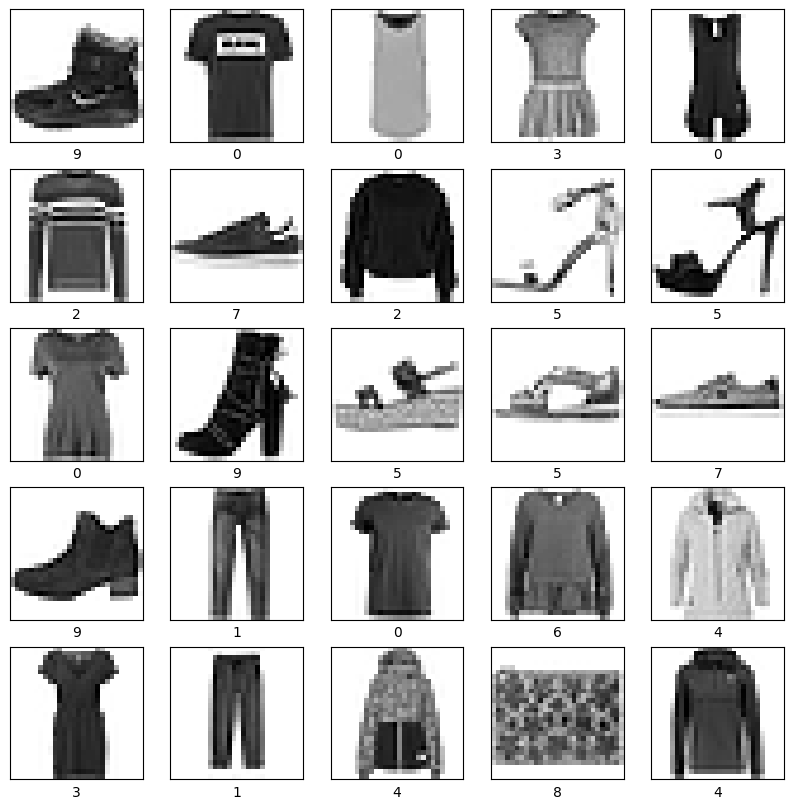

In [ ]:
#plot few sample images using matplot lib from X_train_full
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_full[i])
plt.show()

In [ ]:
# Normalise the pixel intensities to between 0 and 1 by dividing the values by 255.
# And construct the validation set using the first 5000 observations
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
# View the training and validation data shape and type.
print(X_train.shape)
print(X_train.dtype)
print(X_valid.shape)
print(X_valid.dtype)

(55000, 28, 28)
float64
(5000, 28, 28)
float64


In [ ]:
# The labels are an array of integers, ranging from 0 to 9
# Each integer corresponds to one class.
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

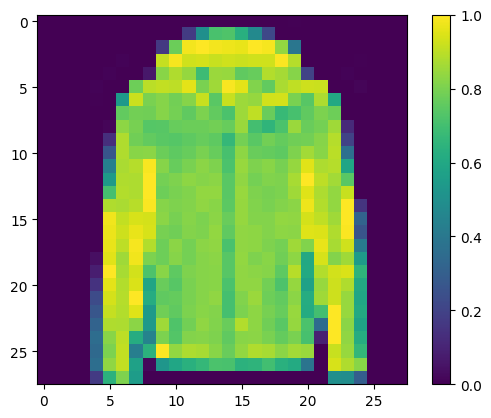

In [ ]:
# Plot an example of an observation from the training set.
class_names[y_train[0]]
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Build the classification model using Keras' Sequential API.
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu")) # Hidden layer 1
model.add(keras.layers.Dense(100, activation="relu")) # Hidden layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # Softmax application because the classes are exclusive

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Plot a summary of the model.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

The dense layer has 235,500 parameters. This is good for fitting the training data but may also lead to overfitting.


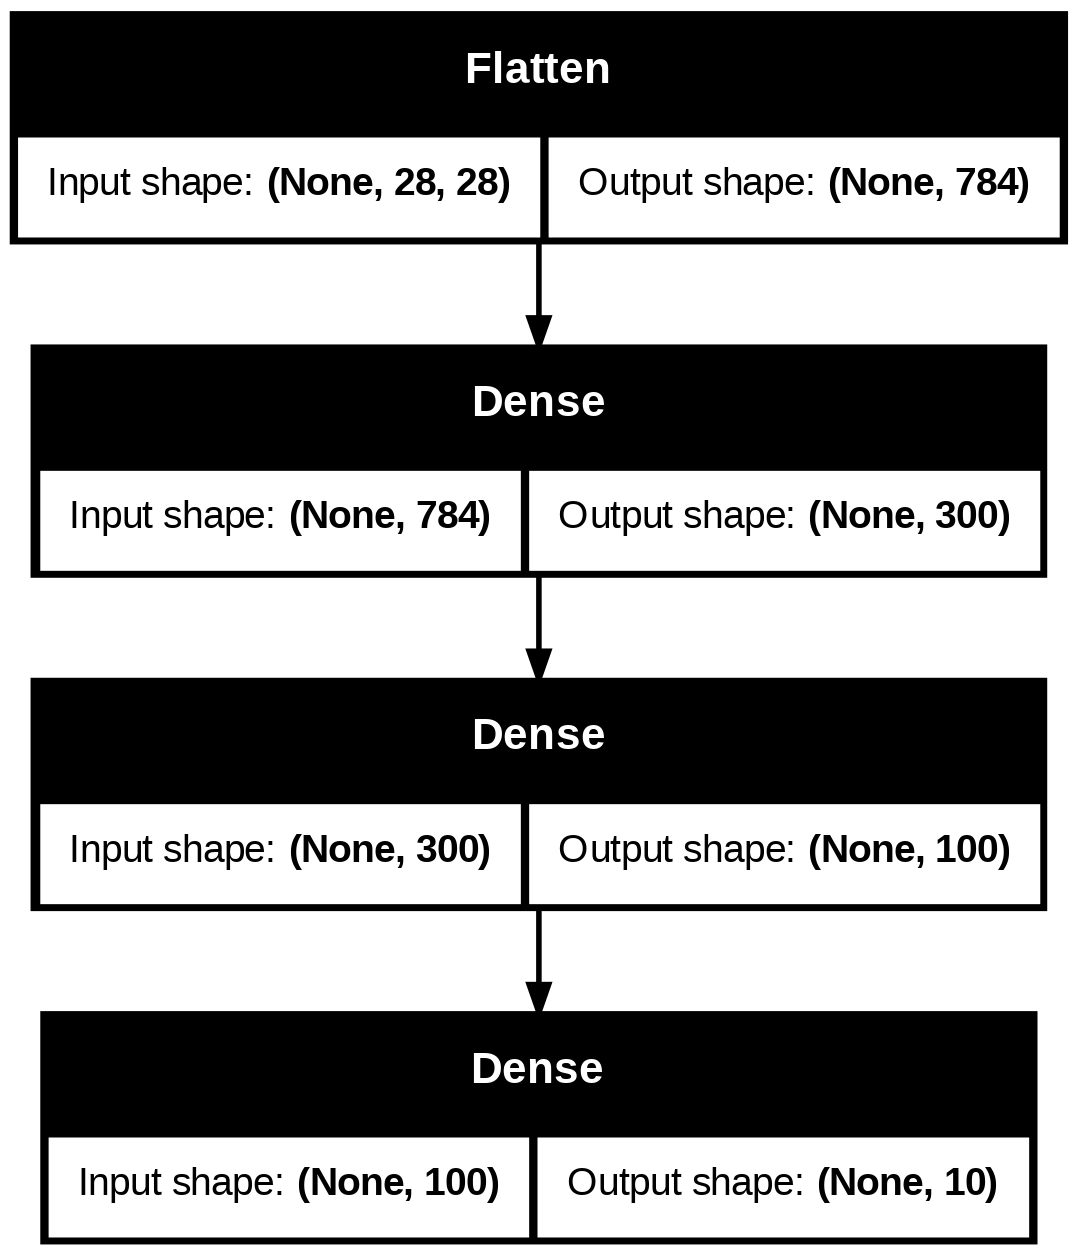

In [ ]:
# Plot a relative model graph.
keras.utils.plot_model(model)

#Plot model graph with activation function details
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Retrieve a list of the model layers.
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
# Alternately, retrieve a layer by its name.
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
# Access the parameters of a specific layer.
weights, biases = hidden1.get_weights()
print(weights)
print(biases)
print(weights.shape)
print(biases.shape)

[[ 0.04257394  0.01946297 -0.00677985 ...  0.05309513 -0.00396966
   0.06085414]
 [ 0.04881718  0.04759023 -0.00437322 ... -0.01795601  0.00976378
  -0.0465204 ]
 [-0.05748273 -0.05408114 -0.04392703 ... -0.04172092 -0.02501082
   0.0078397 ]
 ...
 [ 0.0153382   0.04548466 -0.0391956  ...  0.02943366 -0.02813683
  -0.02831018]
 [ 0.02976536 -0.03266789  0.06838544 ...  0.0291846   0.05377217
   0.00798286]
 [ 0.02640278  0.01055748  0.05682796 ... -0.05427107  0.03581372
  -0.04871693]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

We can see that the biases are all 0 and the weights are random. This is the default initialisation setting.

In [ ]:
# Compile the model, specifying the loss and optimiser as well as an accuracy metric.
model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd",
                  metrics=["accuracy"])

In [ ]:
# Train and evaluate the model using the fit() function.
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6917 - loss: 0.9694 - val_accuracy: 0.8322 - val_loss: 0.5073
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8276 - loss: 0.5013 - val_accuracy: 0.8442 - val_loss: 0.4622
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8387 - loss: 0.4563 - val_accuracy: 0.8454 - val_loss: 0.4354
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8522 - loss: 0.4256 - val_accuracy: 0.8592 - val_loss: 0.4095
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8543 - loss: 0.4076 - val_accuracy: 0.8726 - val_loss: 0.3873
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8614 - loss: 0.3964 - val_accuracy: 0.8700 - val_loss: 0.3715
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8674 - loss: 0.3754 - val_accuracy: 0.8724 - val_loss: 0.3677
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8721 - loss: 0.36

Once we have run the fit function we can check the accuracy and loss over time. If the validation accuracy is much lower than the training validation, we should check for overfitting or other issues.

We can also check the parameters, epochs, and the dictionary containing loss and other performance metrics.

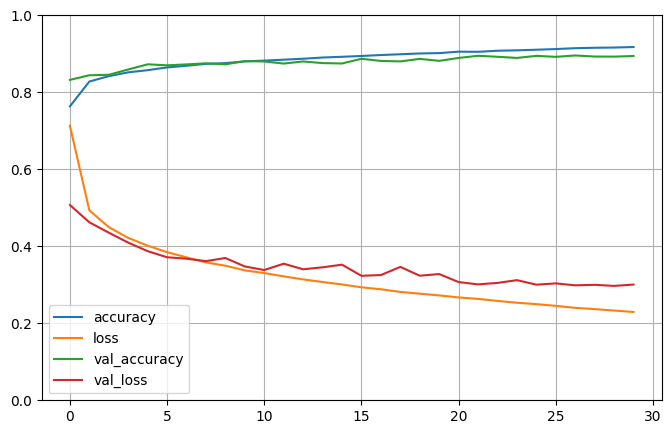

In [ ]:
# Plot the key metrics in a pandas dataframe.
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1].
plt.show()

In [ ]:
# Evaluate the model.
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 65.3288


[67.00139617919922, 0.848800003528595]

In [ ]:
# Make new predictions.
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Key information
This demonstration illustrated how to implement classification using Keras in Python.

## Reflect
What are the pracitical applications of this technique?

> Select the pen from the toolbar to add your entry.